- Generaly we have many columns in a dataset,in that many columns are not important 
- this is called feature selection 
- dropping constant features 
- correlation 
- information gain 
- chi-square 
- p-value
- forward selection and backward selection 

#### Method-1 Dropping constant features

In [ ]:
# only a fixed value will be there in entire data 
# with that value our model will not learn patterns 
# we can drop those columns having a fixed value 
# we use a method called variance threshold 

In [5]:
import pandas as pd 
import numpy as np 
data=pd.DataFrame({"A":[1,2,3,4,5],
                  "B":[1,2,3,4,5],
                  "C":["a","b",30,40,50],
                  "D":[90,34,23,12,12]})
data

,A,B,C,D
0,1,1,a,90
1,2,2,b,34
2,3,3,30,23
3,4,4,40,12
4,5,5,50,12


### variance threshold

- feature selector removes all low variance features 
- this feature selection algorithm only at the features(input features)
- do not apply for target variable 

In [2]:
from sklearn.feature_selection import VarianceThreshold
# import the package 
# save in a variable 
# apply fit and transform 

### Note: before apply variance threshold method make sure your data is numerical 

In [8]:
from sklearn.feature_selection import VarianceThreshold
varianceThreshold=VarianceThreshold(threshold=0.0)
# if variance of any feature is zero then drop that feature
varianceThreshold.fit(data) # above data has categorical values 

ValueError: could not convert string to float: 'a'

In [9]:
data=pd.DataFrame({"A":[1,2,3,4,5],
                  "B":[1,2,3,4,5],
                  "C":[10,20,30,40,50],
                  "D":[90,34,23,12,12]})
data

,A,B,C,D
0,1,1,10,90
1,2,2,20,34
2,3,3,30,23
3,4,4,40,12
4,5,5,50,12


In [10]:
from sklearn.feature_selection import VarianceThreshold
varianceThreshold=VarianceThreshold(threshold=0.0)
# if variance of any feature is zero then drop that feature
varianceThreshold.fit(data)

VarianceThreshold()

In [11]:
varianceThreshold.get_support()
# True: the features have variance more than threshold value 
# False: the features have variance less than or equal to threshold value 

array([ True,  True,  True,  True])

In [12]:
varianceThreshold.get_params() 
# getting variance threshold parameter 

{'threshold': 0.0}

In [13]:
data.columns[varianceThreshold.get_support()]

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
new_data=data[data.columns[varianceThreshold.get_support()]]
new_data

,A,B,C,D
0,1,1,10,90
1,2,2,20,34
2,3,3,30,23
3,4,4,40,12
4,5,5,50,12


### Method-2: Information Gain

estimate mutual information for a discerete target variable.
Mutual Information(MI) between two random variables is a non-negative value, which measures the dependency between the variables.
It is equal to zero if and only if two random variables are independent and higher value means higher dependency.
The function relies on non-parametric methods based on entropy estimation k-nearest distances as described in and both methods are based on the idea originally proposed in.

In [15]:
# suppose if i apply MI between input and output variables
# which input variable has more MI that is my important feature
# MI: dependency between two variables
# here two variables means one is input and another one is output.

In [16]:
I(X:Y)=H(X)-H(X/Y)
where I(X:Y) is the mutual information for X and Y
H(X) is the entropy of X
H(X/Y) is conditional entropy for X given Y
the results shown in the form of bits 

SyntaxError: invalid syntax (1477738015.py, line 1)

In [17]:
df=pd.read_csv("D:\\data\\winequality_red.csv")
df # target variable is quality 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
# identify MI between input and output 
# we need to seperate input columns data and output column data 
# input columns data is X 
# output columns data is Y

In [20]:
Y=df["quality"] # output data 
X=df.drop(["quality"],axis=1) # input data 

In [21]:
from sklearn.feature_selection import mutual_info_classif
MI=mutual_info_classif(X,Y)
MI

array([0.04663195, 0.12447458, 0.05464677, 0.0125982 , 0.03445682,
       0.02799258, 0.08316059, 0.07330474, 0.03197049, 0.09097857,
       0.1960369 ])

In [25]:
MI=pd.Series(MI)
MI.index=X.columns
MI.sort_values(ascending=False)

alcohol                 0.196037
volatile acidity        0.124475
sulphates               0.090979
total sulfur dioxide    0.083161
density                 0.073305
citric acid             0.054647
fixed acidity           0.046632
chlorides               0.034457
pH                      0.031970
free sulfur dioxide     0.027993
residual sugar          0.012598
dtype: float64

<AxesSubplot:>

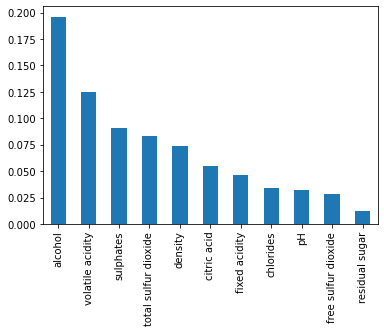

In [26]:
MI.sort_values(ascending=False).plot.bar()

In [27]:
from sklearn.feature_selection import SelectKBest
# select top5 
top5=SelectKBest(mutual_info_classif,k=5)
top5.fit(X,Y)
top5.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [28]:
X.columns[top5.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [29]:
from sklearn.feature_selection import mutual_info_regression 
# you need to check above analysis for any classification data 